# Machine Learning Project
## Kalbe Nutritionals Data Scientist Virtual Internship Rakamin
Clustering Using K-Means

by : Ahmad Fanani


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/KULIAH/Pribadi/VIX Rakamin/W4/Case Study - Transaction.csv', delimiter=';')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [ ]:
# Groupby customerID dan agregasi
grouped_data = df.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'
}).reset_index()

print(grouped_data)

     CustomerID  TransactionID  Qty  TotalAmount
0             1             17   60       623300
1             2             13   57       392300
2             3             15   56       446200
3             4             10   46       302500
4             5              7   27       268600
..          ...            ...  ...          ...
442         443             16   59       485100
443         444             18   62       577700
444         445             18   68       587200
445         446             11   42       423300
446         447             13   42       439300

[447 rows x 4 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

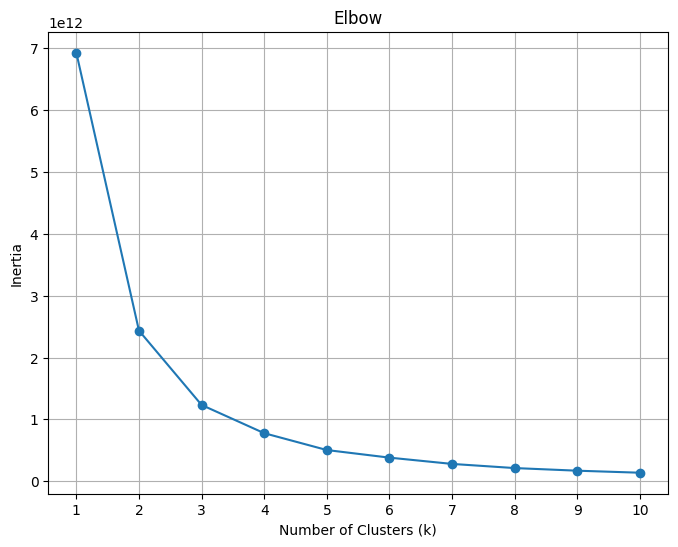

In [ ]:
#elbow
from sklearn.cluster import KMeans
features = grouped_data[['TransactionID', 'Qty', 'TotalAmount']]

# Inertia untuk jumlah cluster dari 1 hingga 10
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plot inertia curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


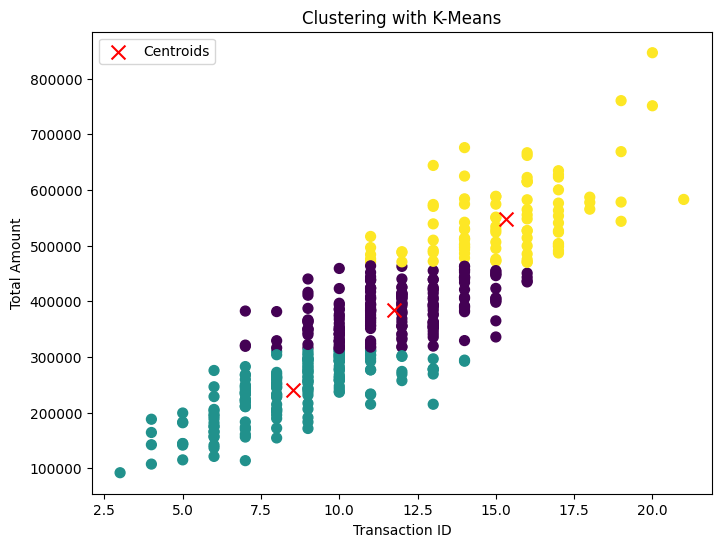

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.DataFrame(grouped_data)

# Features yang akan digunakan untuk clustering
features = grouped_data[['TransactionID', 'Qty', 'TotalAmount']]

# Menentukan jumlah cluster yang diinginkan
n_clusters = 3

# Membuat model K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Melakukan clustering
df['cluster'] = kmeans.fit_predict(features)

# Visualisasi data
plt.figure(figsize=(8, 6))
plt.scatter(df['TransactionID'], df['TotalAmount'], c=df['cluster'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], c='red', marker='x', s=100, label='Centroids')
plt.xlabel('Transaction ID')
plt.ylabel('Total Amount')
plt.title('Clustering with K-Means')
plt.legend()
plt.show()
